In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [2]:
fp = r"C:\Users\kervi\Documents\DataScientest - PROJETS\00 PROJET WORLD HAPPINESS REPORT\projet_world_happiness_pour_machine_learning.csv"

In [3]:
df = pd.read_csv(fp)
df.head()

,Regional_indicator,Country_name,year,Life_Ladder,Log_GDP_per_capita,Social_support,Healthy_life_expectancy_at_birth,Freedom_to_make_life_choices,Generosity,Perceptions_of_corruption
0,South Asia,Afghanistan,2008,3.724,7.370,0.451,50.80,0.718,0.168,0.882
1,South Asia,Afghanistan,2009,4.402,7.540,0.552,51.20,0.679,0.190,0.850
2,South Asia,Afghanistan,2010,4.758,7.647,0.539,51.60,0.600,0.121,0.707
3,South Asia,Afghanistan,2011,3.832,7.620,0.521,51.92,0.496,0.162,0.731
4,South Asia,Afghanistan,2012,3.783,7.705,0.521,52.24,0.531,0.236,0.776


In [4]:
# Séparation des variables explicatives de la variable cible
X = df.drop(['Life_Ladder', 'year', 'Country_name', 'Regional_indicator'], axis=1)
y = df['Life_Ladder']

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import learning_curve


In [6]:
# Diviser les données en ensemble d'entraînement et ensemble de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
display(X_train.shape)
display(X_test.shape)

(1619, 6)

(405, 6)

### TEST DE PLUSIEURS ALGORITHMES DE MACHINE LEARNING (sans prendre en compte la chronologie)

In [8]:
# FONCTIONS POUR TESTER PLUSIEURS ALGORITHMES DE ML

def test_models(X_train, y_train, X_test, y_test):
    
    # Standardisation des variables explicatives
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    
    # Liste des modèles à tester
    models = [LinearRegression(), Lasso(), Ridge(), DecisionTreeRegressor(), RandomForestRegressor()]
    
    # Dictionnaire pour stocker les scores de chaque modèle
    scores = {'model': [], 'mse': [], 'rmse': [], 'r2': [], 'mae': []}
    train_scores = {'model': [], 'mse': [], 'rmse': [], 'r2': [], 'mae': []}
    
    # Boucle sur les modèles
    for model in models:
        
        # Entraînement du modèle
        model.fit(X_train, y_train)
        
        # Prédiction sur l'ensemble de test
        y_pred = model.predict(X_test)
        
        # Prédiction à l'entrainement
        y_train_pred = model.predict(X_train)
        
        # Calcul des scores d'entrainement
        train_mse = mean_squared_error(y_train, y_train_pred)
        train_rmse = np.sqrt(train_mse)
        train_r2 = r2_score(y_train, y_train_pred)
        train_mae = mean_absolute_error(y_train, y_train_pred)
        
        
        
        # Calcul des scores de test
        mse = mean_squared_error(y_test, y_pred)
        rmse = np.sqrt(mse)
        r2 = r2_score(y_test, y_pred)
        mae = mean_absolute_error(y_test, y_pred)
        
        
        # Stockage des scores dans le dictionnaire
        scores['model'].append(type(model).__name__)
        train_scores['model'].append(type(model).__name__)
        

        
        
        train_scores['mse'].append(train_mse)
        train_scores['rmse'].append(train_rmse)
        train_scores['r2'].append(train_r2)
        train_scores['mae'].append(train_mae)
    
        scores['mse'].append(mse)
        scores['rmse'].append(rmse)
        scores['r2'].append(r2)
        scores['mae'].append(mae)
        
        
    # Conversion du dictionnaire en DataFrame
    scores_df = pd.DataFrame(scores)
    train_scores_df = pd.DataFrame(train_scores)
    
    return scores_df, train_scores_df
    

# Tester les modèles
results = test_models(X_train, y_train, X_test, y_test)
results


(                   model       mse      rmse        r2       mae
 0       LinearRegression  0.293944  0.542166  0.766619  0.415058
 1                  Lasso  1.259534  1.122290 -0.000024  0.933234
 2                  Ridge  0.293952  0.542173  0.766613  0.415062
 3  DecisionTreeRegressor  0.336216  0.579842  0.733057  0.418109
 4  RandomForestRegressor  0.159183  0.398977  0.873615  0.299915,
                    model       mse      rmse        r2       mae
 0       LinearRegression  0.317312  0.563305  0.748979  0.436069
 1                  Lasso  1.264085  1.124315  0.000000  0.937425
 2                  Ridge  0.317312  0.563305  0.748979  0.436085
 3  DecisionTreeRegressor  0.000000  0.000000  1.000000  0.000000
 4  RandomForestRegressor  0.025997  0.161235  0.979434  0.119040)

## Courbe de régréssion d'apprentissage et de test pour RandomForestRegressor

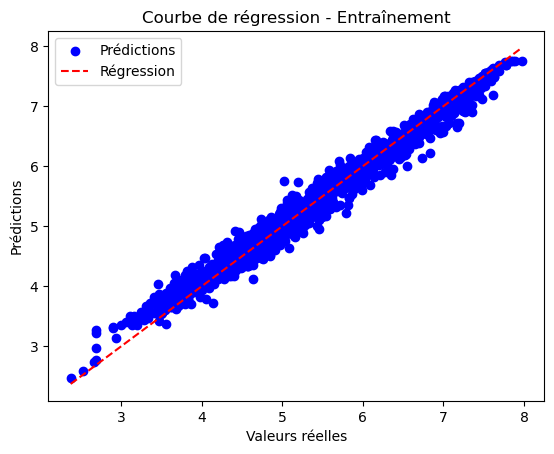

In [9]:
import matplotlib.pyplot as plt

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Entraînement du modèle sur l'ensemble des données
model = RandomForestRegressor()
model.fit(X_train_scaled, y_train)

# Prédiction sur l'ensemble des données
y_pred_train = model.predict(X_train_scaled)

# Tracé de la courbe de régression
plt.scatter(y_train, y_pred_train, color='blue', label='Prédictions')
plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], color='red', linestyle='--', label='Régression')
plt.xlabel('Valeurs réelles')
plt.ylabel('Prédictions')
plt.title('Courbe de régression - Entraînement')
plt.legend()
plt.show()

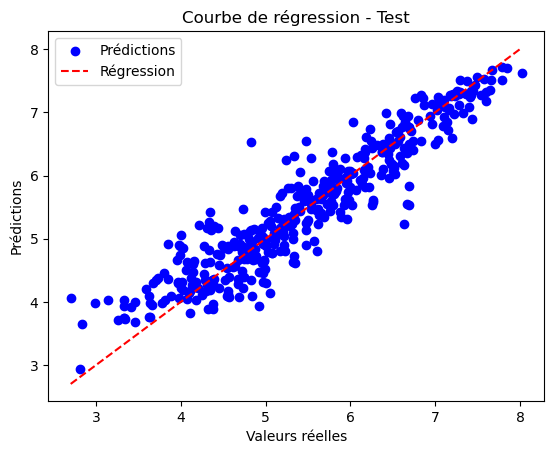

In [10]:
import matplotlib.pyplot as plt

# Prédiction sur l'ensemble de test
y_pred_test = model.predict(X_test_scaled)

# Tracé de la courbe de régression
plt.scatter(y_test, y_pred_test, color='blue', label='Prédictions')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Régression')
plt.xlabel('Valeurs réelles')
plt.ylabel('Prédictions')
plt.title('Courbe de régression - Test')
plt.legend()
plt.show()


## LEARNING CURVE

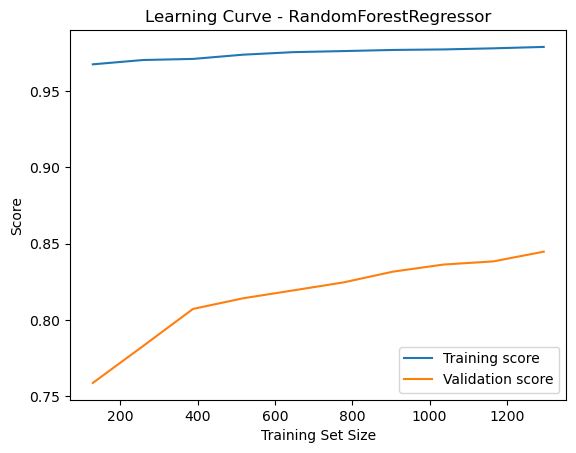

In [11]:
RF_model = RandomForestRegressor()

# Calcul de la courbe d'apprentissage
N, train_scores, val_scores = learning_curve(RF_model, X_train_scaled, y_train, train_sizes=np.linspace(0.1, 1.0, 10), cv=5)

# Tracé de la courbe d'apprentissage
plt.figure()
plt.plot(N, train_scores.mean(axis=1), label='Training score')
plt.plot(N, val_scores.mean(axis=1), label='Validation score')
plt.xlabel('Training Set Size')
plt.ylabel('Score')
plt.title('Learning Curve - RandomForestRegressor')
plt.legend()
plt.show()

#### Si la courbe d'apprentissage pour l'ensemble d'entraînement reste horizontale à un score de 1, cela pourrait signifier que le modèle est capable de parfaitement s'adapter aux données d'entraînement. Cela peut se produire lorsque le modèle est surajusté (overfitting) aux données d'entraînement.

#### Il y a quelques raisons possibles pour lesquelles cela se produit :

#### Surajustement (overfitting) : Le modèle mémorise les données d'entraînement au lieu de généraliser.

#### Données d'entraînement limitées : Si la taille de l'ensemble d'entraînement est petite, il est possible que le modèle puisse mémoriser les données sans avoir à généraliser. L'ajout de plus de données d'entraînement peut aider à améliorer la performance du modèle.


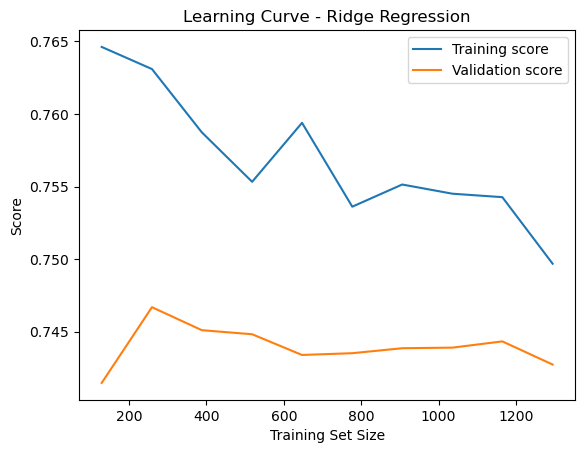

In [12]:
ridge_model = Ridge()

# Calcul de la courbe d'apprentissage
N, train_scores, val_scores = learning_curve(ridge_model, X_train_scaled, y_train, train_sizes=np.linspace(0.1, 1.0, 10), cv=5)

# Tracé de la courbe d'apprentissage
plt.figure()
plt.plot(N, train_scores.mean(axis=1), label='Training score')
plt.plot(N, val_scores.mean(axis=1), label='Validation score')
plt.xlabel('Training Set Size')
plt.ylabel('Score')
plt.title('Learning Curve - Ridge Regression')
plt.legend()
plt.show()


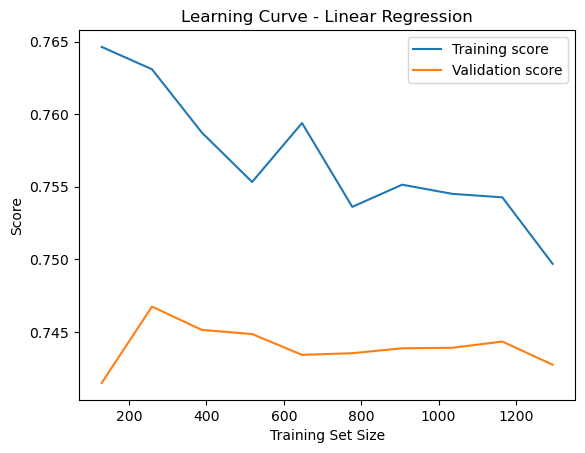

In [13]:
Linear_reg_model = LinearRegression()

# Calcul de la courbe d'apprentissage
N, train_scores, val_scores = learning_curve(Linear_reg_model, X_train_scaled, y_train, train_sizes=np.linspace(0.1, 1.0, 10), cv=5)

# Tracé de la courbe d'apprentissage
plt.figure()
plt.plot(N, train_scores.mean(axis=1), label='Training score')
plt.plot(N, val_scores.mean(axis=1), label='Validation score')
plt.xlabel('Training Set Size')
plt.ylabel('Score')
plt.title('Learning Curve - Linear Regression')
plt.legend()
plt.show()

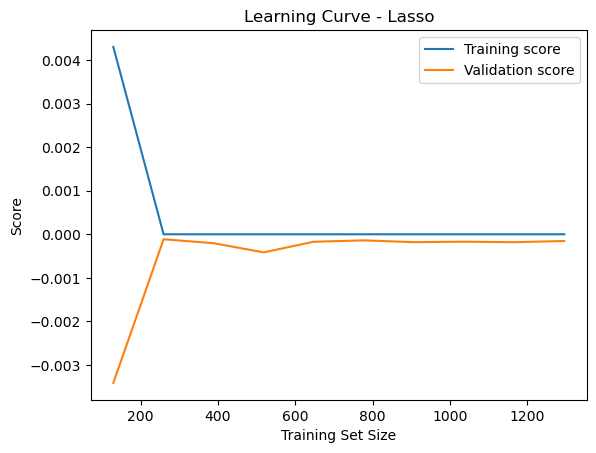

In [14]:
Lasso_model = Lasso()

# Calcul de la courbe d'apprentissage
N, train_scores, val_scores = learning_curve(Lasso_model, X_train_scaled, y_train, train_sizes=np.linspace(0.1, 1.0, 10), cv=5)

# Tracé de la courbe d'apprentissage
plt.figure()
plt.plot(N, train_scores.mean(axis=1), label='Training score')
plt.plot(N, val_scores.mean(axis=1), label='Validation score')
plt.xlabel('Training Set Size')
plt.ylabel('Score')
plt.title('Learning Curve - Lasso')
plt.legend()
plt.show()

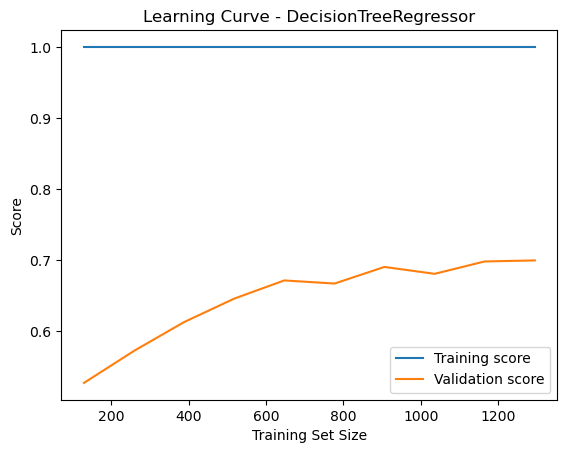

In [15]:
DTR_model = DecisionTreeRegressor()

# Calcul de la courbe d'apprentissage
N, train_scores, val_scores = learning_curve(DTR_model, X_train_scaled, y_train, train_sizes=np.linspace(0.1, 1.0, 10), cv=5)

# Tracé de la courbe d'apprentissage
plt.figure()
plt.plot(N, train_scores.mean(axis=1), label='Training score')
plt.plot(N, val_scores.mean(axis=1), label='Validation score')
plt.xlabel('Training Set Size')
plt.ylabel('Score')
plt.title('Learning Curve - DecisionTreeRegressor')
plt.legend()
plt.show()

In [16]:
results

(                   model       mse      rmse        r2       mae
 0       LinearRegression  0.293944  0.542166  0.766619  0.415058
 1                  Lasso  1.259534  1.122290 -0.000024  0.933234
 2                  Ridge  0.293952  0.542173  0.766613  0.415062
 3  DecisionTreeRegressor  0.336216  0.579842  0.733057  0.418109
 4  RandomForestRegressor  0.159183  0.398977  0.873615  0.299915,
                    model       mse      rmse        r2       mae
 0       LinearRegression  0.317312  0.563305  0.748979  0.436069
 1                  Lasso  1.264085  1.124315  0.000000  0.937425
 2                  Ridge  0.317312  0.563305  0.748979  0.436085
 3  DecisionTreeRegressor  0.000000  0.000000  1.000000  0.000000
 4  RandomForestRegressor  0.025997  0.161235  0.979434  0.119040)

## Courbe de régréssion d'apprentissage et de test pour RIDGE

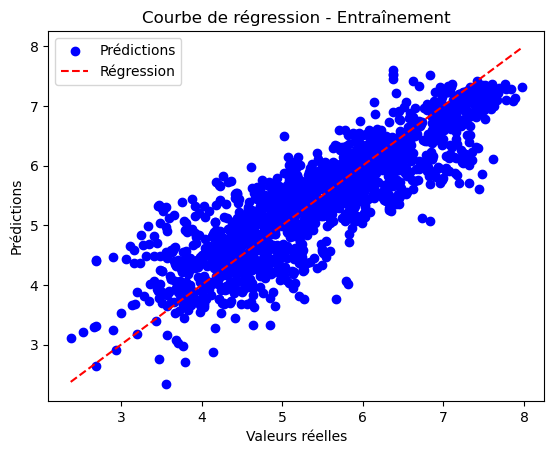

In [17]:
ridge_model = Ridge()
ridge_model.fit(X_train_scaled, y_train)

# Prédiction sur l'ensemble des données
y_pred_train = ridge_model.predict(X_train_scaled)

# Tracé de la courbe de régression
plt.scatter(y_train, y_pred_train, color='blue', label='Prédictions')
plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], color='red', linestyle='--', label='Régression')
plt.xlabel('Valeurs réelles')
plt.ylabel('Prédictions')
plt.title('Courbe de régression - Entraînement')
plt.legend()
plt.show()

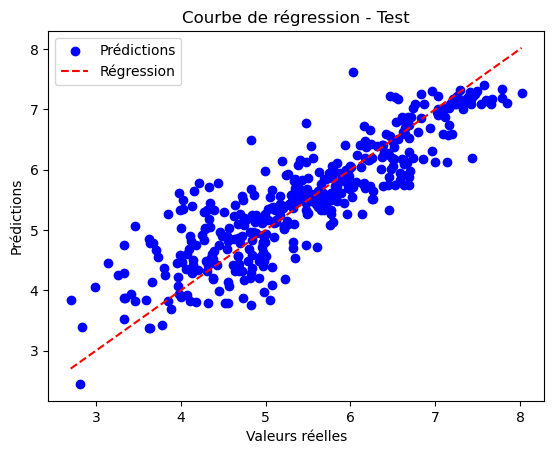

In [18]:
# Prédiction sur l'ensemble de test
y_pred_test = ridge_model.predict(X_test_scaled)

# Tracé de la courbe de régression
plt.scatter(y_test, y_pred_test, color='blue', label='Prédictions')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Régression')
plt.xlabel('Valeurs réelles')
plt.ylabel('Prédictions')
plt.title('Courbe de régression - Test')
plt.legend()
plt.show()

## On remarque que plus les scores du bonheur sont élevés, plus nos prédictions sont précises

# Dans notre cas, les algorithmes testés sont soit en situation d'overfitting soit en manque de stabilité ( pour le Ridge regression et le Linear regression, les performances chutes à partir d'un training size de 1200)

## Pour palier à ces soucis, nous allons tester des algorithmes d'ensemble

####  Les algorithmes d'ensemble permettent souvent d'obtenir de meilleures performances prédictives par rapport à un seul modèle. En combinant les prédictions de plusieurs modèles, les algorithmes d'ensemble peuvent réduire le biais et la variance, ce qui conduit généralement à des résultats plus précis.

####  L'un des principaux problèmes en apprentissage automatique est le surapprentissage, c'est-à-dire lorsque le modèle est trop spécialisé dans les données d'entraînement et ne se généralise pas bien aux nouvelles données. Les algorithmes d'ensemble, comme le bagging et le boosting, permettent de réduire le surapprentissage en agrégeant les prédictions de plusieurs modèles différents, ce qui favorise la généralisation.

## BOOSTING ET BAGGING

In [19]:
df = pd.read_csv(fp)

In [20]:
# Séparation des variables explicatives de la variable cible
X = df.drop(['Life_Ladder', 'year', 'Country_name', 'Regional_indicator'], axis=1)
y = df['Life_Ladder']

In [21]:
# Diviser les données en ensemble d'entraînement et ensemble de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [22]:
# FONCTIONS POUR TESTER PLUSIEURS ALGORITHMES DE BOOSTING ET BAGGING

from sklearn.ensemble import BaggingRegressor, GradientBoostingRegressor, AdaBoostRegressor

def test_ensemble_models(X_train, y_train, X_test, y_test):
    
    # Standardisation des variables explicatives
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    
    # Liste des modèles à tester
    models = [BaggingRegressor(), GradientBoostingRegressor(), AdaBoostRegressor()]
    
    # Dictionnaire pour stocker les scores de chaque modèle
    scores = {'model': [], 'mse': [], 'rmse': [], 'r2': [], 'mae': []}
    train_scores = {'model': [], 'mse': [], 'rmse': [], 'r2': [], 'mae': []}
    
    # Boucle sur les modèles
    for model in models:
        
        # Entraînement du modèle
        model.fit(X_train, y_train)
        
        # Prédiction sur l'ensemble de test
        y_pred = model.predict(X_test)
        
        # Prédiction à l'entrainement
        y_train_pred = model.predict(X_train)
        
        # Calcul des scores d'entrainement
        train_mse = mean_squared_error(y_train, y_train_pred)
        train_rmse = np.sqrt(train_mse)
        train_r2 = r2_score(y_train, y_train_pred)
        train_mae = mean_absolute_error(y_train, y_train_pred)
        
        
        
        # Calcul des scores de test
        mse = mean_squared_error(y_test, y_pred)
        rmse = np.sqrt(mse)
        r2 = r2_score(y_test, y_pred)
        mae = mean_absolute_error(y_test, y_pred)
        
        
        # Stockage des scores dans le dictionnaire
        scores['model'].append(type(model).__name__)
        train_scores['model'].append(type(model).__name__)
        

        
        
        train_scores['mse'].append(train_mse)
        train_scores['rmse'].append(train_rmse)
        train_scores['r2'].append(train_r2)
        train_scores['mae'].append(train_mae)
    
        scores['mse'].append(mse)
        scores['rmse'].append(rmse)
        scores['r2'].append(r2)
        scores['mae'].append(mae)
        
        
    # Conversion du dictionnaire en DataFrame
    scores_df = pd.DataFrame(scores)
    train_scores_df = pd.DataFrame(train_scores)
    
    return scores_df, train_scores_df
    

# Tester les modèles
results_ensemble = test_ensemble_models(X_train, y_train, X_test, y_test)
results_ensemble


(                       model       mse      rmse        r2       mae
 0           BaggingRegressor  0.185621  0.430838  0.852624  0.330822
 1  GradientBoostingRegressor  0.224129  0.473423  0.822050  0.362469
 2          AdaBoostRegressor  0.279545  0.528720  0.778052  0.431310,
                        model       mse      rmse        r2       mae
 0           BaggingRegressor  0.035862  0.189374  0.971630  0.132524
 1  GradientBoostingRegressor  0.158285  0.397851  0.874783  0.306091
 2          AdaBoostRegressor  0.261139  0.511017  0.793417  0.429175)

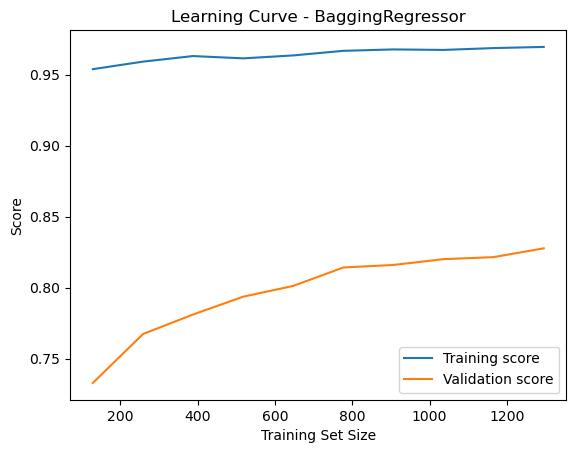

In [23]:
BR_model = BaggingRegressor()

# Calcul de la courbe d'apprentissage
N, train_scores, val_scores = learning_curve(BR_model, X_train_scaled, y_train, train_sizes=np.linspace(0.1, 1.0, 10), cv=5)

# Tracé de la courbe d'apprentissage
plt.figure()
plt.plot(N, train_scores.mean(axis=1), label='Training score')
plt.plot(N, val_scores.mean(axis=1), label='Validation score')
plt.xlabel('Training Set Size')
plt.ylabel('Score')
plt.title('Learning Curve - BaggingRegressor')
plt.legend()
plt.show()

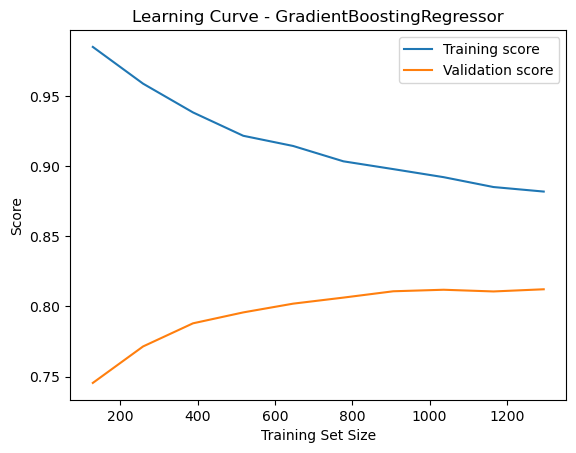

In [24]:
GBR_model = GradientBoostingRegressor()

# Calcul de la courbe d'apprentissage
N, train_scores, val_scores = learning_curve(GBR_model, X_train_scaled, y_train, train_sizes=np.linspace(0.1, 1.0, 10), cv=5)

# Tracé de la courbe d'apprentissage
plt.figure()
plt.plot(N, train_scores.mean(axis=1), label='Training score')
plt.plot(N, val_scores.mean(axis=1), label='Validation score')
plt.xlabel('Training Set Size')
plt.ylabel('Score')
plt.title('Learning Curve - GradientBoostingRegressor')
plt.legend()
plt.show()

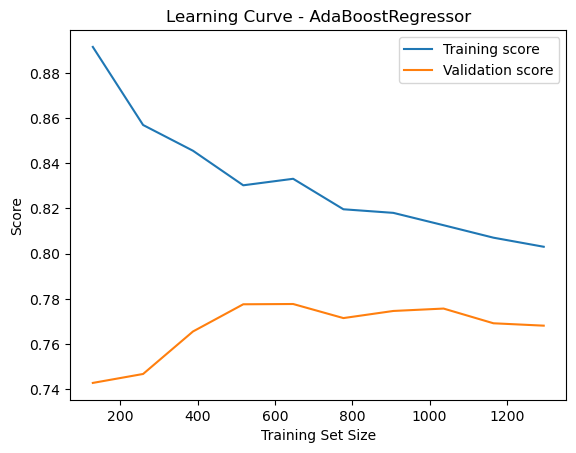

In [25]:
ABR_model = AdaBoostRegressor()

# Calcul de la courbe d'apprentissage
N, train_scores, val_scores = learning_curve(ABR_model, X_train_scaled, y_train, train_sizes=np.linspace(0.1, 1.0, 10), cv=5)

# Tracé de la courbe d'apprentissage
plt.figure()
plt.plot(N, train_scores.mean(axis=1), label='Training score')
plt.plot(N, val_scores.mean(axis=1), label='Validation score')
plt.xlabel('Training Set Size')
plt.ylabel('Score')
plt.title('Learning Curve - AdaBoostRegressor')
plt.legend()
plt.show()

In [26]:
results_ensemble

(                       model       mse      rmse        r2       mae
 0           BaggingRegressor  0.185621  0.430838  0.852624  0.330822
 1  GradientBoostingRegressor  0.224129  0.473423  0.822050  0.362469
 2          AdaBoostRegressor  0.279545  0.528720  0.778052  0.431310,
                        model       mse      rmse        r2       mae
 0           BaggingRegressor  0.035862  0.189374  0.971630  0.132524
 1  GradientBoostingRegressor  0.158285  0.397851  0.874783  0.306091
 2          AdaBoostRegressor  0.261139  0.511017  0.793417  0.429175)

# CHOIX DE L'ALGORITHME POUR LA PREDICTION DU SCORE DU BONHEUR : Le Gradient Bossting Regressor

#### Le choix se porte sur l'algorithme GradientBoostingRegressor en se basant sur les métriques R2 et MAE et les courbes d'apprentissage (learning curves) où on peut observer la stabilité et la cohérence entre le score d'entrainement et le score de validation.

#### Le coefficient de détermination R2 de 0.82 indique que le modèle explique environ 85% de la variance totale de la variable cible.

#### L'erreur absolue moyenne (MAE) de 0.36 signifie que, en moyenne, les prédictions du modèle diffèrent de 0.329074 unités de la valeur réelle.


#### L'algorithme GradientBoostingRegressor est une méthode d'apprentissage automatique utilisée pour la régression. Il s'agit d'une approche basée sur l'ensemble, où plusieurs modèles de régression faibles sont combinés pour former un modèle plus fort. Il est également robuste aux valeurs aberrantes grâce à l'utilisation des résidus dans les itérations successives.

## AJUSTEMENT DES HYPERPARAMETRES

In [27]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint, uniform


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Création du modèle GradientBoostingRegressor
model = GradientBoostingRegressor()

# Définition de la distribution des hyperparamètres à explorer
param_dist = {
    'n_estimators': randint(50, 200),
    'learning_rate': uniform(0.01, 1.0),
    'max_depth': randint(3, 7),
    'min_samples_split': randint(2, 10),
    'subsample': [0.8, 1.0],
    'loss': ['ls', 'lad', 'huber']
}

# Recherche aléatoire avec validation croisée
random_search = RandomizedSearchCV(model, param_dist, n_iter=10, cv=5, scoring='neg_mean_squared_error')
random_search.fit(X_train_scaled, y_train)

# Meilleurs hyperparamètres trouvés
best_params = random_search.best_params_

# Meilleur modèle entraîné avec les meilleurs hyperparamètres
best_model = random_search.best_estimator_

# Prédiction avec le meilleur modèle
predictions = best_model.predict(X_test_scaled)

C:\Users\kervi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
35 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\kervi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\kervi\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 420, in fit
    self._validate_params()
  File "C:\Users\kervi\anaconda3\lib\site-packages\sklearn\base.py", line 600, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\kervi\anaconda3\lib\site-packages\sk

## Après plusieurs essais, les meilleurs hyperparamètres trouvés sont les suivants :

In [28]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Création du modèle GradientBoostingRegressor
GBR_model = GradientBoostingRegressor()

best_params = {'learning_rate': 0.05434946446799217,
 'loss': 'huber',
 'max_depth': 3,
 'min_samples_split': 5,
 'n_estimators': 120,
 'subsample': 0.6}


# Utilisation des meilleurs hyperparamètres trouvés
GBR_model.set_params(**best_params)

# Entraînement du modèle avec les meilleurs hyperparamètres
GBR_model.fit(X_train_scaled, y_train)

# Prédiction avec le meilleur modèle
predictions = GBR_model.predict(X_test_scaled)

In [29]:
# Calcul des scores
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, predictions)
mae = mean_absolute_error(y_test, predictions)

print("MSE: ", mse)
print("RMSE: ", rmse)
print("R2: ", r2)
print("MAE: ", mae)

MSE:  0.22058568533438735
RMSE:  0.46966550366658544
R2:  0.8248630743789527
MAE:  0.35798716525765045


## L'ajustement des hyperparamètres nous permet d'améliorer les performances de l'algorithmes.

## Nous passons d'un R2 de 0.82 à 0.84 et d'une MAE de 0.361853 à 0.33

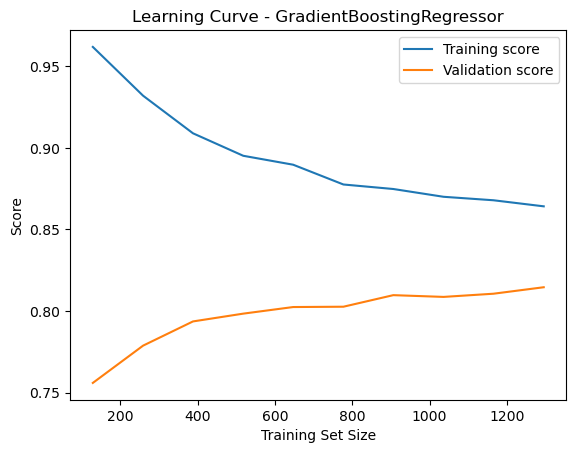

In [30]:
# Calcul de la courbe d'apprentissage
N, train_scores, val_scores = learning_curve(GBR_model, X_train_scaled, y_train, train_sizes=np.linspace(0.1, 1.0, 10), cv=5)

# Tracé de la courbe d'apprentissage
plt.figure()
plt.plot(N, train_scores.mean(axis=1), label='Training score')
plt.plot(N, val_scores.mean(axis=1), label='Validation score')
plt.xlabel('Training Set Size')
plt.ylabel('Score')
plt.title('Learning Curve - GradientBoostingRegressor')
plt.legend()
plt.show()

## FEATURE IMPORTANCE

In [31]:
# Obtention des noms de colonnes après l'encodage
encoded_feature_names = list(X_train.columns)

In [32]:
# Obtenir la feature importance
feature_importance = GBR_model.feature_importances_

In [33]:
# Créer un DataFrame pour afficher les résultats
importance_df = pd.DataFrame({'Feature':encoded_feature_names, 'Importance': feature_importance})

# Trier les features par ordre décroissant d'importance
importance_df = importance_df.sort_values('Importance', ascending=False)

# Afficher les résultats
print(importance_df)

                            Feature  Importance
0                Log_GDP_per_capita    0.486315
2  Healthy_life_expectancy_at_birth    0.293034
1                    Social_support    0.124707
3      Freedom_to_make_life_choices    0.042498
4                        Generosity    0.028307
5         Perceptions_of_corruption    0.025139


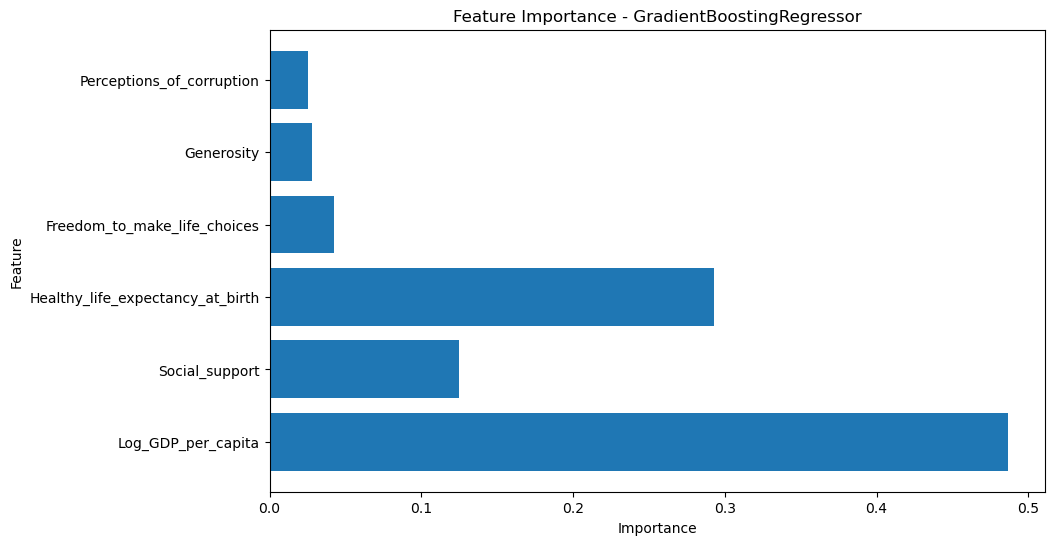

In [34]:
# Tracé des scores d'importance des fonctionnalités
plt.figure(figsize=(10, 6))
plt.barh(encoded_feature_names, feature_importance)
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance - GradientBoostingRegressor')
plt.show()

In [35]:
feature_importance_ = list(zip(encoded_feature_names, feature_importance))

In [36]:
feature_importance_sorted = sorted(feature_importance_, key=lambda x: abs(x[1]), reverse=True)

In [37]:
sorted_features, sorted_scores = zip(*feature_importance_sorted)

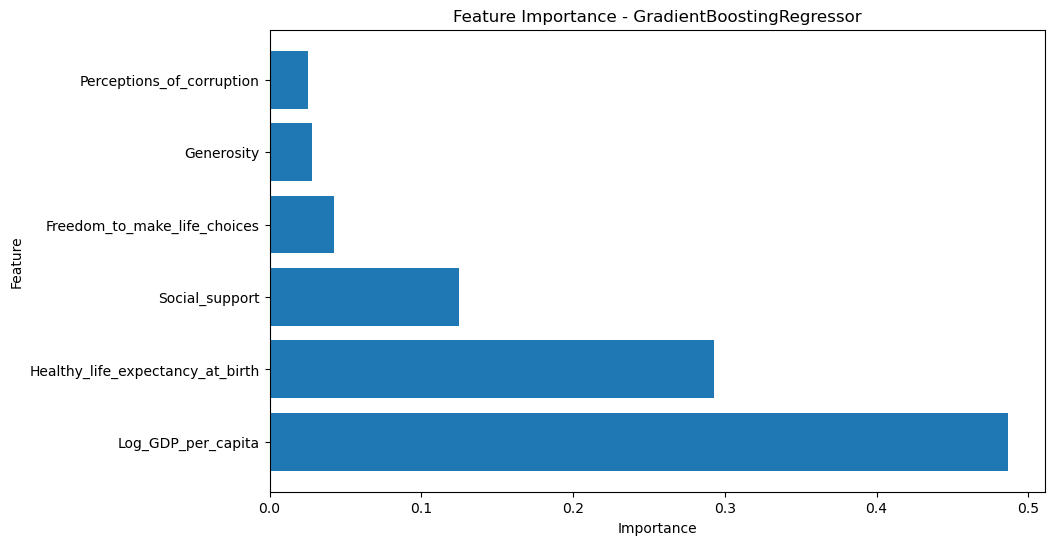

In [38]:
plt.figure(figsize=(10, 6))
plt.barh(sorted_features, sorted_scores)
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance - GradientBoostingRegressor')
plt.show()

## Le nombre optimal de variables est finalement toutes les variables, c'est à dire les 6

# SAUVEGARDE DU MODELE

In [39]:
from joblib import dump, load

dump(GBR_model, 'GDBregressor.joblib')


['GDBregressor.joblib']

In [40]:
# Chargement du modèle sauvegardé
loaded_model = load('GDBregressor.joblib')

# Utilisation du modèle chargé pour faire des prédictions
loaded_model.predict(X_test_scaled)

array([5.34042975, 7.3073669 , 4.87565076, 7.02411148, 6.62398823,
       4.76463442, 4.90816626, 4.62162006, 5.67974096, 7.1957075 ,
       4.41626691, 5.62793143, 3.74227779, 5.97969656, 5.98667009,
       4.10019142, 4.74099286, 7.35954952, 4.76602937, 4.1938725 ,
       6.29176906, 3.82081794, 5.44383873, 4.58194188, 6.52774711,
       5.96513385, 5.23528123, 4.76633916, 5.84027936, 6.34529925,
       3.95070429, 4.87048398, 7.0566902 , 3.71603663, 4.64587455,
       6.4654471 , 4.96328881, 6.47230256, 4.41265509, 4.58872022,
       4.35393084, 5.34431667, 4.05376221, 4.77586802, 5.46277773,
       6.59200996, 4.0030313 , 5.17134997, 5.06845466, 4.33034476,
       6.36054546, 5.20267481, 4.65116566, 5.81347285, 5.47779184,
       4.21284196, 5.77861663, 4.29779262, 6.27617711, 5.46250557,
       4.20830275, 4.43359545, 6.48039025, 6.45196496, 7.42412399,
       6.4630862 , 5.41823926, 5.78023496, 5.1815376 , 4.23110424,
       6.55958056, 4.86687403, 5.08156383, 5.87615985, 6.07443